In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### CSCI 447 Fall 2023 Kaggle Competition

In [25]:
train = pd.read_csv('data/kaggle_train.csv')
test = pd.read_csv('data/kaggle_test.csv')
# example = pd.read_csv('data/kaggle_example_submission.csv')

In [26]:
train

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,1,0.777029,-0.268638,0.006591,2.941390,1.738013,1.672624,1.073224,-1.225081,2.700900,3.661704,6.567695,2.098585,-0.547649,0.523154,0.786378,0.104577,1.903580,-0.377440,-0.315180,-0.164134,-18.759727
1,2,1.203906,0.536988,0.476183,0.982111,1.737830,1.640134,0.302358,1.782921,1.442371,0.002198,0.144266,0.997498,0.856467,0.696694,0.628658,1.075109,2.234290,-0.388820,0.644219,0.724307,8.082223
2,3,0.751503,-0.036427,0.404269,0.143162,1.737872,1.680058,1.071646,1.263593,1.153890,0.232469,3.315893,1.511541,1.185047,0.269776,0.701282,1.041008,1.847635,1.163074,1.259852,0.548363,2.961315
3,4,0.669598,0.685746,0.328121,1.353119,1.737922,1.683888,-0.632106,0.140971,1.549584,2.136884,4.153014,2.043596,0.706472,0.925189,0.656511,0.524939,1.878676,2.755045,1.664802,0.453177,-0.710178
4,5,0.731188,-0.272476,0.375570,2.343038,1.737871,1.668550,1.747394,0.788427,2.094505,0.598815,-0.912722,0.446173,-1.051054,0.931456,0.949737,0.641303,1.958897,-2.146309,1.793418,1.107921,5.328069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0.727128,0.659784,0.189603,0.871884,1.737953,1.663123,0.011820,0.455213,1.570676,1.601924,0.582432,0.018540,0.676099,0.238891,0.921408,0.435090,1.559085,1.253568,1.351787,-0.208061,-5.492524
396,397,0.721650,0.063371,0.104771,-0.304936,1.737823,1.669915,0.467188,-1.075683,1.027013,-0.815221,3.340801,0.594496,2.106144,0.472494,0.880513,0.661462,3.645808,-1.926029,2.298594,0.202313,-5.085613
397,398,0.643112,0.277107,0.299154,2.177613,1.737892,1.675028,0.328016,0.528663,2.316577,0.890271,0.011226,1.832636,0.469831,0.839231,0.810295,0.561670,2.142701,-0.266876,1.841052,0.240394,-0.515391
398,399,0.885107,0.162407,0.519112,-0.209804,1.737816,1.661044,0.467411,2.288113,0.937617,-0.443033,-0.200005,-0.743676,0.573866,0.867120,0.389433,0.442357,2.915442,0.157586,1.276146,0.688184,11.585216


In [27]:
# show features that correlate most with target
train.corr()['target'].sort_values(ascending=False)

target    1.000000
f3        0.464147
f8        0.439835
f4        0.387962
f9        0.371760
f1        0.149368
id        0.040860
f2        0.033108
f20       0.021008
f14       0.009516
f13       0.005158
f11      -0.028136
f16      -0.029950
f7       -0.030978
f12      -0.037815
f18      -0.045382
f19      -0.062521
f15      -0.066573
f17      -0.081215
f6       -0.105405
f10      -0.583736
f5       -0.608965
Name: target, dtype: float64

---

In [28]:
# Remove features that correlate weakly with target (run this to do that)
train_correlated = train.copy()
train_correlated = train_correlated.drop(['f14', 'f13','f11'], axis=1)

train = train_correlated

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### XGBoost:

In [30]:
# split data into train and test sets
X = train.drop(['target', 'id'], axis=1)
y = train['target']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.5, random_state=42)

In [31]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_reduced, y_train_reduced)
y_pred = xgb.predict(X_test_reduced)
mse = mean_squared_error(y_test_reduced, y_pred)
print('MSE:', mse)

MSE: 20.50412997657645


In [32]:
# # grid search on xgb
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# params = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [1, 2, 3, 4, 5],
#     'min_child_weight': [1, 2, 3],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'reg_alpha': [0, 0.1, 0.2],
#     'reg_lambda': [0, 0.1, 0.2]
# }
# # grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)
# best_xgb = grid.best_estimator_
# y_pred = best_xgb.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print('MSE:', mse)

In [48]:
xgb_best_so_far = XGBRegressor(n_estimators=500, learning_rate=0.2, max_depth=1, min_child_weight=1, gamma=0.1, random_state=42)
xgb_best_so_far.fit(X_train_reduced, y_train_reduced)
y_pred = xgb_best_so_far.predict(X_test_reduced)
mse = mean_squared_error(y_test_reduced, y_pred)
print('MSE:', mse)

MSE: 4.451592724922674


#### FEATURE ENGINEERING:

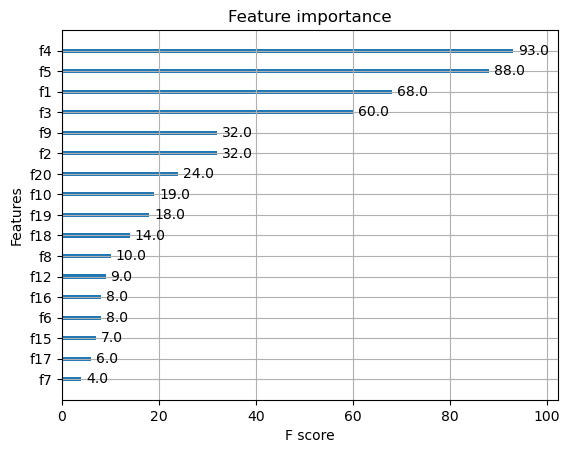

In [34]:
# find most important features
from xgboost import plot_importance
plot_importance(xgb_best_so_far)
plt.show()

In [51]:
test_reduced = train[['f4','f5','f1','f3','target']]
X = test_reduced.drop(['target'], axis=1)
y = test_reduced['target']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.4, random_state=42)
xgb_best_so_far.fit(X_train_reduced, y_train_reduced)
y_pred = xgb_best_so_far.predict(X_test_reduced)
mse = mean_squared_error(y_test_reduced, y_pred)
print('MSE:', mse)

MSE: 4.451592724922674


In [36]:
test

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,401,0.963814,-0.360401,-0.041354,-1.565599,1.737945,1.659717,1.480158,-1.717814,0.536475,2.357983,3.021644,0.784399,1.435519,0.582982,0.683580,0.294960,1.892775,0.262734,0.826233,0.506849
1,402,1.118852,0.807891,0.311665,-1.129158,1.737983,1.656538,-0.933568,1.409432,0.691151,3.304468,-2.564095,1.259623,0.057445,0.564418,0.966116,0.598086,2.361560,0.923635,2.364288,0.745997
2,403,1.063174,0.283987,0.329134,0.857807,1.737917,1.648599,0.475067,0.896373,1.681297,2.063451,2.842105,3.744957,0.387059,0.491567,0.791949,0.693784,1.637491,-2.519111,1.012792,0.578348
3,404,1.176543,0.321864,0.325012,-0.708241,1.737978,1.642645,0.034345,0.876352,1.005261,2.897911,2.124828,2.267765,-0.510772,0.640024,0.751590,1.652641,2.170502,1.488497,1.525883,0.102574
4,405,0.741057,-0.143084,0.503625,1.111256,1.737958,1.674302,1.511315,2.195464,1.838759,2.421853,0.955074,2.295911,-1.613589,0.895568,0.764478,1.527531,2.589030,1.249002,1.257046,0.484814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1196,0.882169,-0.330601,0.421486,0.737417,1.737958,1.658254,1.431353,1.108439,1.713432,2.995714,3.014464,0.333175,0.658956,0.462397,1.023638,1.056993,1.817185,0.650101,0.022090,0.748257
796,1197,0.842735,-0.206032,0.391464,1.233258,1.737914,1.666913,1.038027,1.724601,1.574431,1.034499,2.330435,2.361229,-0.614883,0.429164,0.561538,0.730597,3.324751,0.051646,0.065434,0.245175
797,1198,1.270291,-0.076628,0.778258,2.607416,1.737807,1.634654,2.011403,3.847710,2.426282,-0.312374,2.441963,1.912125,0.461157,0.193702,0.794979,0.653671,2.598912,-1.376646,1.981512,0.412225
798,1199,0.511655,0.202319,0.397267,0.398529,1.737963,1.684076,0.395272,1.464093,1.550634,2.929768,1.971027,1.825962,-0.223628,0.313292,0.670579,0.078815,1.041687,-0.554884,2.302289,1.144097


In [39]:
# predict test set and save to csv with ID, target
test_reduced = test[['id', 'f4','f5','f1','f3']]
test_reduced = test_reduced.drop(['id'], axis=1)
predictions = xgb_best_so_far.predict(test_reduced)
predictions = pd.DataFrame(predictions, columns=['target'])
predictions = pd.concat([test, predictions], axis=1)
# predictions = predictions[['target']]
predictions = predictions[['id', 'target']]
predictions

,id,target
0,401,-29.408815
1,402,-8.007330
2,403,-0.598297
3,404,-3.735546
4,405,2.605402
...,...,...
795,1196,1.563525
796,1197,2.252036
797,1198,24.691690
798,1199,-2.324005
